## Clustering Workshop: Online Retail Dataset

Dataset:
https://archive.ics.uci.edu/ml/datasets/online+retail

Objective:
Explore the dataset by finding clusters

### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Attribute Information:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# You can use read_excel, but it requires additional dependencies, and
# isn't as easy to use as pd.read_csv

df = pd.read_csv('C:\\courses\\data\\online-retail\\Online Retail.csv', parse_dates=True, encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.isnull().values.any()

True

In [4]:
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,1/12/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,1/12/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,1/12/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,1/12/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1/12/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,1/12/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,1/12/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,1/12/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,1/12/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,1/12/2010 14:32,0.43,NaN,United Kingdom


In [5]:
df.dropna(inplace=True)

In [6]:
# See what types we need to convert
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Data Transformation (Estimated time: 60 minutes)


### Which of these should we convert to numbers?
```
InvoiceNo              object -> Label Encode
StockCode              object -> Label Encode
Description            object -> Tfidf
Quantity                int64
InvoiceDate            object -> pd.to_datetime
UnitPrice             float64
CustomerID            float64
Country                object -> Label Encode
```

### 1. Label Encode string columns (except Description)

Q: is it better to keep separate encoders or to use separate columns?

A: separate encoders are cheaper for large datasets because you would only need to store the label mapping in memory

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder_invoice_no = LabelEncoder()
df['InvoiceNo'] = encoder_invoice_no.fit_transform(df['InvoiceNo'])

encoder_stock_code = LabelEncoder()
df['StockCode'] = encoder_stock_code.fit_transform(df['StockCode'])

encoder_country = LabelEncoder()
df['Country'] = encoder_country.fit_transform(df['Country'])

### 2. Convert InvoiceDate column from string to datetime

Try something like:
```
pd.to_datetime(..., format='%d/%m/%Y %H:%M')
```

In [8]:
# Convert dates (Optional)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:28:00
8        2010-12-01 08:28:00
9        2010-12-01 08:34:00
10       2010-12-01 08:34:00
11       2010-12-01 08:34:00
12       2010-12-01 08:34:00
13       2010-12-01 08:34:00
14       2010-12-01 08:34:00
15       2010-12-01 08:34:00
16       2010-12-01 08:34:00
17       2010-12-01 08:34:00
18       2010-12-01 08:34:00
19       2010-12-01 08:34:00
20       2010-12-01 08:34:00
21       2010-12-01 08:34:00
22       2010-12-01 08:34:00
23       2010-12-01 08:34:00
24       2010-12-01 08:34:00
25       2010-12-01 08:35:00
26       2010-12-01 08:45:00
27       2010-12-01 08:45:00
28       2010-12-01 08:45:00
29       2010-12-01 08:45:00
                 ...        
541879   2011-12-09 12:31:00
541880   2011-12-09 12:31:00
541881   2011-12-09 12:31:00
541882   2011-

### 3. Convert Description to Tf-Idf features

Description is fairly simple text, so we can try scikit learn's tokenizer. 

No need to use spacy to tokenize.

```
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             max_df=3, min_df=1)
```

- max_df allows us to skip words that are too frequent
- min_df allows us to skip words are are too unique

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# description is fairly simple text, so we can try scikit learn's tokenizer
#
# max_df allows us to skip words that are too frequent
# min_df allows us to skip words are are too unique
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             max_df=3, min_df=1)

#vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
#                             max_df=0.85, min_df=0.001)

description_tfidf = vectorizer.fit_transform(df.Description)

# print a few features
print(description_tfidf.shape)
print(vectorizer.get_feature_names()[:100])

(406829, 109)
['16x16cm', '17080', '25w', '42', '60x40cm', '8m', 'allium', 'anemone', 'antoienett', 'aqua', 'articulated', 'azure', 'banner', 'bazaar', 'beauty', 'birdie', 'blackchristmas', 'blk', 'braclet', 'branch', 'brass', 'briar', 'bronze', 'bum', 'camping', 'canary', 'cannabis', 'capiz', 'chains', 'chests', 'choker', 'congratulations', 'cote', 'crawlie', 'crome', 'crusoe', 'crystals', 'cutglass', 'demi', 'diamon', 'doc', 'dolphin', 'doors', 'dotcomgiftshop', 'droplet', 'dusty', 'eye', 'flamingo', 'flowr', 'fragrance', 'freshwater', 'girly', 'glasses', 'guitar', 'heavens', 'hens', 'high', 'hold', 'image', 'kashmiri', 'knif', 'laser', 'lighthouse', 'loveheart', 'mao', 'mark', 'marshmallow', 'maxwell', 'melamine', 'miror', 'montan', 'mummy', 'newspaper', 'oils', 'ol', 'old', 'opal', 'page', 'peridot', 'pom', 'poodle', 'portraits', 'pouri', 'quartz', 'resolution', 'reto', 'ribbed', 'robin', 'russel', 'russian', 'scallop', 'sil', 'sisters', 'sizes', 'sow', 'squ', 'stiletto', 'suck', '

### Combine all converted columns into our dataframe

Something like this:

```
# Recall that TFIDF has each term as a feature

df_tfidf = pd.DataFrame(list(description_tfidf.toarray()),  
                        columns=vectorizer.get_feature_names(),
                        index=df.index)
                        
# Combine into 1 dataframe

df_combined = pd.concat([df, df_tfidf], axis=1)
```

In [10]:
list(description_tfidf.toarray())

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([0., 

In [11]:
# Add to our dataframe
# Recall that TFIDF has each term as a feature

df_tfidf = pd.DataFrame(description_tfidf.toarray(),
                        columns=vectorizer.get_feature_names(),
                        index=df.index)

df_combined = pd.concat([df, df_tfidf], axis=1)

df_combined

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,16x16cm,17080,...,teal,tigris,tinsel,tiny,tone,tools,turquois,weekend,whit,wht
0,0,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1605,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,755,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1490,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1489,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2,3069,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster! (Estimated time: 90 minutes)

### 1. Pick our numeric columns

```
columns = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']

columns = columns + vectorizer.get_feature_names()
```

... Then apply .loc to select them

In [12]:
columns = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']

columns = columns + vectorizer.get_feature_names()

### 2. Pick a subset of datapoints to try clustering

(let's say 300 datapoints)

(You can always add more datapoints after you have the initial clustering model)

In [13]:
X = df_combined.loc[:300, columns]
X.shape

(301, 115)

### 3. Plot the data points

In [14]:
# Apply PCA to convert to 2-dimensions

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [16]:
# Plot the scatter plot

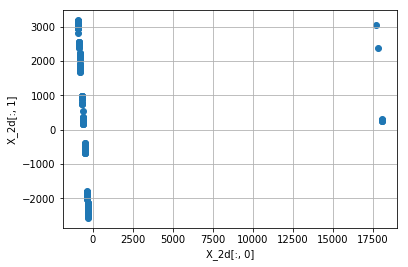

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1])
ax.grid()
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]')
plt.show()

In [18]:
import numpy as np

def plot_decision_boundaries(ax, title, kmeans_model, data):
    """Plots the decision boundaries for a fitted k-means model
    Args:
        ax: subplot axis
        title: subplot title
        kmeans_model: a fitted sklearn.cluster.KMeans model
        data: 2-dimensional input data to cluster and plot
 
    Based on: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .5     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the trained model.
    Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    ax.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=plt.cm.Pastel2,
              aspect='auto', origin='lower')

    ax.plot(data[:, 0], data[:, 1], 'k.', markersize=4)

    # Plot the centroids as a red X
    centroids = kmeans.cluster_centers_

    ax.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=169, linewidths=3,
               color='red', zorder=10, label='centroids')
    ax.set(title=title,
           xlim=(x_min, x_max), ylim=(y_min, y_max),
           xticks=(), yticks=())
    ax.legend()

In [19]:
X_2d.shape

(301, 2)

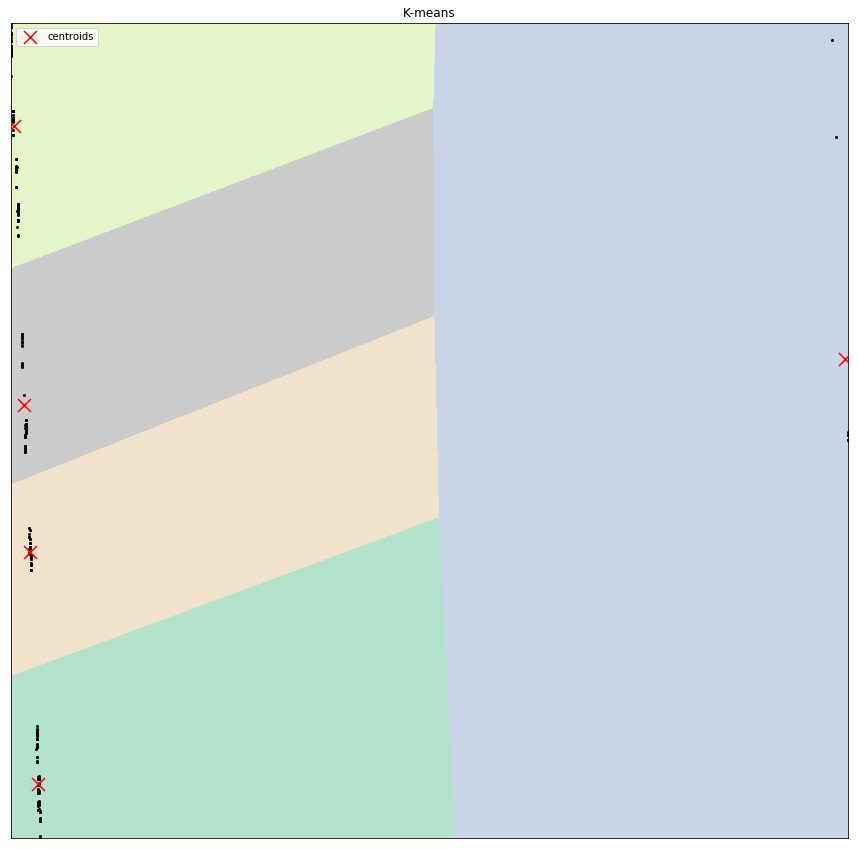

In [20]:
from sklearn.cluster import KMeans

n_classes = 5
fig, ax = plt.subplots(figsize=(15, 15))

kmeans = KMeans(n_clusters=n_classes)
kmeans.fit(X_2d)
plot_decision_boundaries(ax, 'K-means', kmeans, X_2d)

### 4. Apply KMeans clustering

In [4]:
# Scale the df_combined dataframe using StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Plot the Elbow diagram to pick the number of clusters for kmeans

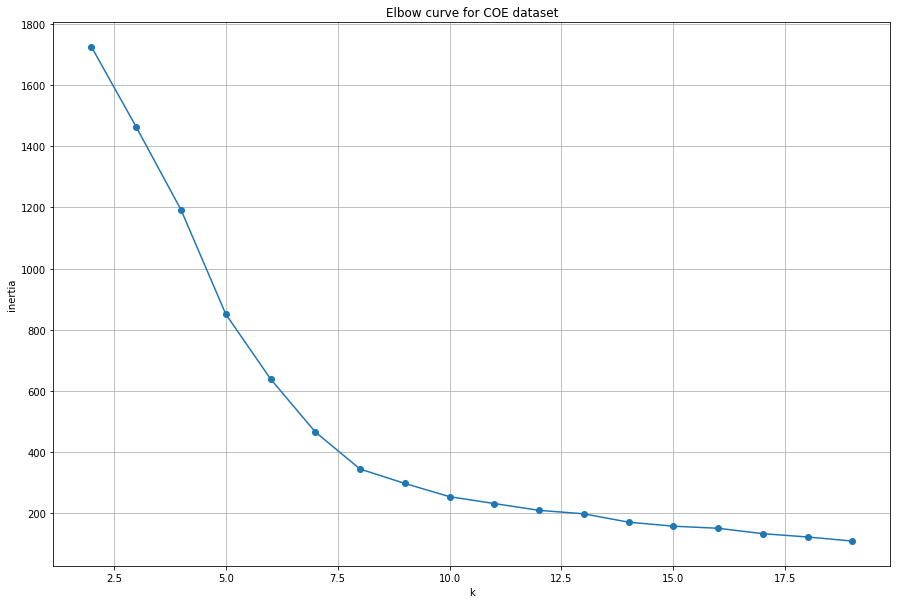

In [22]:
ks = range(2, 20)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    
    # inertia: sum of squared distances of samples
    # to their closest cluster center.
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(ks, inertias, marker='o')
ax.grid()
ax.set(title='Elbow curve for COE dataset',
       xlabel='k', ylabel='inertia')
plt.show()

### 5. Re-plot the PCA plot with cluster centroids for the best k

1. Pick the best k

2. Do something like this to PCA transform the cluster centers:
```
centroids_2d = pca.transform(kmeans.cluster_centers_)
```

3. Re-plot the PCA scatter plot with the cluster centers overlaid.


4. You can also colour the scatter plots using the cluster ids

Input dataset (9999, 115)
After K-means with 8 clusters (8, 115)
Input dataset (2D) (9999, 2)
Centroids (2D) (8, 2)


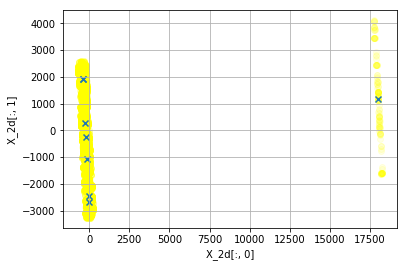

In [23]:
k = 8

X = df_combined.iloc[:9999]
X = X.loc[:, columns]
print('Input dataset', X.shape)

# Run KMeans on dataset
kmeans = KMeans(n_clusters=k)
kmeans.fit(X) # 115 dimensions

print('After K-means with 8 clusters', kmeans.cluster_centers_.shape)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
print('Input dataset (2D)', X_2d.shape)

# convert kmeans.cluster_centers_ to 2 dimensions
centroids_2d = pca.transform(kmeans.cluster_centers_)
print('Centroids (2D)', centroids_2d.shape)

# plot PCA again with X for kmeans.cluster_centers_
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], alpha=.1, color='yellow')

ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x')

ax.grid()
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]')
plt.show()

### 6. Cluster Metrics

Since we don't have the labels, we have to use silhouette_score

```
from sklearn.metrics import silhouette_score

# S=(b-a)/max(a, b)
# a: average distance between each sample and samples from the same cluster
# b: average distance between each sample and nearest cluster samples

print(silhouette_score(X, clusters, sample_size=300, random_state=42))
```

### Exploring data with clusters

Now that we have the clusters, we can use pandas to divide the dataset into the clusters.

In [ ]:
df['cluster'] = clusters
df.head()

In [ ]:
df[df.cluster==1].head()

In [ ]:
df[df.cluster==2].head()

In [ ]:
df[df.cluster==3].head()

In [ ]:
df[df.cluster==1].describe()

In [ ]:
df[df.cluster==2].describe()

In [ ]:
df[df.cluster==3].describe()